In [2]:
# we want to code connect4
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from numba import njit


def plot_board(board):
    plt.figure(figsize=(2.5, 2.5))
    board = np.array(board)  # Assuming self.board is the attribute containing your board data

    for i in range(6):
        for j in range(7):
            x = j
            y = 6-i
            if board[i][j] == 1:
                plt.plot(x, y, 'o', color='green', markersize=14)
            elif board[i][j] == 2:
                plt.plot(x, y, 'o', color='red', markersize=14)
    # change so we plot a bit more in each direction
    plt.xlim(-0.5, 6.5)
    plt.ylim(0.5, 6.5)

    # set background to dark gray
    ax = plt.gca()
    ax.set_facecolor((1, 1, 1))

    # remove the ticks and axis labels
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    
    plt.show()


class Connect4:
    def __init__(self):
        self.board = np.array([[0 for i in range(7)] for j in range(6)])
        self.player = 1
        self.winner = 0
        self.moves_made = []

    def __str__(self):
        s = ""
        for i in range(6):
            for j in range(7):
                s += str(self.board[i][j]) + " "
            s += "\n"
        return s

    def switch_player(self):
        self.player = 3 - self.player

    def play(self, move): # we will use a function to play the game,
        if self.board[0][move] != 0:
            print("Invalid move")
            return False
        for i in range(5, -1, -1):
            if self.board[i][move] == 0:
                self.board[i][move] = self.player
                break
        self.moves_made.append(move)
        self.switch_player()
        return True

    def plot(self):
        plot_board(self.board)


@njit
def check_winner(board):
    # returns 0 if no winner, 1 if player 1 won, 2 if player 2 won

    # check horizontal
    for i in range(6):
        for j in range(4):
            if board[i][j] != 0 and board[i][j] == board[i][j + 1] and board[i][j] == board[i][j + 2] and board[i][j] == board[i][j + 3]:
                return board[i][j]

    # check vertical
    for i in range(3):
        for j in range(7):
            if board[i][j] != 0 and board[i][j] == board[i + 1][j] and board[i][j] == board[i + 2][j] and board[i][j] == board[i + 3][j]:
                return board[i][j]

    # check diagonal
    for i in range(3):
        for j in range(4):
            if board[i][j] != 0 and board[i][j] == board[i + 1][j + 1] and board[i][j] == board[i + 2][j + 2] and board[i][j] == board[i + 3][j + 3]:
                return board[i][j]

    # check other diagonal
    for i in range(3):
        for j in range(3, 7):
            if board[i][j] != 0 and board[i][j] == board[i + 1][j - 1] and board[i][j] == board[i + 2][j - 2] and board[i][j] == board[i + 3][j - 3]:
                return board[i][j]

    return 0


def play_game(bot1, bot2, start_player = 0, visualize = False, print_moves = False, halt = False):
    if start_player == 0:
        start_player = random.randint(1, 2)
    
    game = Connect4()
    game.player = start_player
    winner = 0

    while True:
        botname = bot1.__name__ if game.player == 1 else bot2.__name__
        if game.player == 1:
            move = bot1(game.board, game.player, game.moves_made[-1] if len(game.moves_made) > 0 else None)
        else:
            move = bot2(game.board, game.player, game.moves_made[-1] if len(game.moves_made) > 0 else None)
        flag = game.play(move)
        if flag == False:
            winner = 3 - game.player
            print(f"{botname} ({3-game.player}) made an invalid move, and therefore loses")
            return winner, start_player, game.moves_made

        if print_moves:
            print(f"{botname} ({3-game.player}) played {move}")

        if visualize == "print":
            print(game)
        if visualize == "plot":
            game.plot()

        winner = check_winner(game.board)
        if winner != 0:
            break
        if 0 not in game.board[0]:
            winner = 0
            break

        if halt:
            inp = input("Press enter to continue, type 'q' to quit")
            if inp == "q":
                break

    # print the name of the bot (function name)
    if print_moves:
        if winner == 1:
            print("The winner is",bot1.__name__)
        elif winner == 2:
            print("The winner is",bot2.__name__)
        else:
            print("It's a draw")

    return winner, start_player, game.moves_made


def playback_game(moves_made, start_player, halt = False):
    game = Connect4()
    game.player = start_player
    for move in moves_made:
        game.play(move)
        game.plot()
        print(game)
        if halt:
            inp = input("Press enter to continue, type 'q' to quit")
            if inp == "q":
                break


def human_bot(board, player, last_move):
    while True:
        move = int(input(f"Last move done was {last_move}. \nhuman_bot({player}), enter your move: "))
        if board[0][move] == 0:
            return move
        else:
            print("Invalid move")


# def simulate_games(bot1, bot2, N = 100, start_player = 0):
#     # simulates N games between bot1 and bot2
#     # returns the number of games won by bot1 and bot2

#     bot1_wins = 0
#     bot2_wins = 0
#     draws = 0
#     games = []

#     for i in range(N):
#         winner, start_player, moves_made = play_game(bot1, bot2, start_player = start_player)
#         games.append([winner, start_player, moves_made])
#         if winner == 1:
#             bot1_wins += 1
#         elif winner == 2:
#             bot2_wins += 1
#         else:
#             draws += 1

#     return bot1_wins, bot2_wins, draws, games
def simulate_games(bot1, bot2, N = 100, starting_player = 0, print_time = False):
    # simulates N games between bot1 and bot2
    # returns the number of games won by bot1 and bot2

    bot1_wins = 0
    bot2_wins = 0
    draws = 0
    games = []
    t = time.time()
    for i in range(N):
        if print_time and i % (N//10) == 0:
            print(f"Game {i}/{N} started after {time.time() - t:.2f} seconds")

        winner, start_player, moves_made = play_game(bot1, bot2, start_player = starting_player)
        games.append([winner, start_player, moves_made])
        if winner == 1:
            bot1_wins += 1
        elif winner == 2:
            bot2_wins += 1
        else:
            draws += 1

    stats = [bot1_wins, bot2_wins, draws]
    return stats, games

# # example of how to play a game:
# # here we play a game between two humans, after each move the move made (0-6) is printed and the board is plotted
# play_game(human_bot, human_bot, visualize = "plot", print_moves = True, halt = False)


In [3]:
def check_connect_four(board):
    def check_line(line):
        for i in range(len(line) - 3):
            if line[i] == line[i + 1] == line[i + 2] == line[i + 3] and line[i] != 0:
                return True
        return False

    def is_board_full():
        return all(cell != 0 for row in board for cell in row)

    def check_winner():
        # Check horizontal lines
        for row in board:
            if check_line(row):
                return True

        # Check vertical lines
        for col in range(len(board[0])):
            if check_line([board[row][col] for row in range(len(board))]):
                return True

        # Check diagonal lines (from top-left to bottom-right)
        for row in range(len(board) - 3):
            for col in range(len(board[0]) - 3):
                if check_line([board[row + i][col + i] for i in range(4)]):
                    return True

        # Check diagonal lines (from top-right to bottom-left)
        for row in range(3, len(board)):
            for col in range(len(board[0]) - 3):
                if check_line([board[row - i][col + i] for i in range(4)]):
                    return True

        return False
    if check_winner():
        return True
    
    else:
        return False

In [4]:
class Memory:
    def __init__(self, current):
        self.current = current

memory = Memory(0)
def tetris_bot(board, player, last_move):
    priority = [3, 4, 2, 1, 5, 6, 0]
    for i in range(len(priority)):
        if board[0][priority[i]] == 0:
            return priority[i]
        
def nokia(board, player, last_move):
    liste = [0,1,2,3,4,5,6,5,4,3,2,1]
    while True:
        if board[0][liste[memory.current]] == 0:
            a = memory.current
            memory.current+=1
            memory.current%=12
            return liste[a]
        else:
            memory.current+=1
            memory.current%=12
        
def moist_bot(board, player, last_move):
    a = random.randint(0,6)
    try:
        if board[0][last_move] == 0 and a<4:
            return last_move
        else:
            while True:
                a = random.randint(0,6)
                if board[0][a] == 0:
                    return a
    except:
        return random.randint(2,4)

def anish_giri(board, player, last_move):
    dict = {
    0:6,
    1:5,
    2:4,
    3:3,
    6:0,
    5:1,
    4:2
    }

    try:
        if board[0][dict[last_move]] == 0:
            return dict[last_move]
        else:
            while True:
                a = random.randint(0,6)
                if board[0][a] == 0:
                    return a
    except:
        while True:
            a = random.randint(0,6)
            if board[0][a] == 0:
                return a    


def zig(board, player, last_move):
    a = random.randint(-1,1)
    try:
        if board[0][last_move+a] == 0:
            if last_move+a == -1:
                return 6
            return last_move+a
        
        else:
            while True:
                a = random.randint(0,6)
                if board[0][a] == 0:
                    return a
    except:
        while True:
            a = random.randint(0,6)
            if board[0][a] == 0:
                return a


In [153]:
import copy


def morad(board, player, last_move):
    if last_move == None:
        return 3

    spill = Connect4()
    spill.board = copy.deepcopy(board)
    spill.player = player
    original_board = copy.deepcopy(board)

    my_dict = {}


    for a in range(7):
        my_dict[a]=0
        spill.board = copy.deepcopy(original_board)
        spill.player = player

        if spill.board[0][a]==0:
            
            spill.play(a)

            save = copy.deepcopy(spill.board)
            if check_connect_four(spill.board):
                return a

        else:
            continue
        
        for b in range(7):
            # print(save)
            spill.board = copy.deepcopy(save)
            
            spill.player = 3-player

            if spill.board[0][b]==0:
                spill.play(b)

                save1 = copy.deepcopy(spill.board)
                if check_connect_four(spill.board) and a!=b:
                    return b


    for a in range(7):
        my_dict[a]=0
        spill.board = copy.deepcopy(original_board)
        spill.player = player

        if spill.board[0][a]==0:
            
            spill.play(a)

            save = copy.deepcopy(spill.board)

        else:
            continue
        
        for b in range(7):
            # print(save)
            spill.board = copy.deepcopy(save)
            
            spill.player = 3-player

            if spill.board[0][b]==0:
                spill.play(b)

                save1 = copy.deepcopy(spill.board)

            else:
                continue
            
            for c in range(7):
                spill.board = copy.deepcopy(save1)
                spill.player = player

                if spill.board[0][c]==0:
                    spill.play(c)
                    save2 = copy.deepcopy(spill.board)

                    if check_connect_four(spill.board):
                        my_dict[a]+=1
                        continue
                else:
                    continue

            
                for d in range(7):
                    spill.board = copy.deepcopy(save2)
                    spill.player = 3-player

                    if spill.board[0][d]==0:
                        spill.play(d) 
                        save3 = copy.deepcopy(spill.board)
                        if check_connect_four(spill.board):
                            my_dict[a]-=1
                            continue

                    else:
                        continue

                    for e in range(7):
                        spill.board = copy.deepcopy(save3)
                        spill.player = player

                        if spill.board[0][e]==0:
                            spill.play(e)
                            save4 = copy.deepcopy(spill.board)


                            if check_connect_four(spill.board):
                                my_dict[a]+=1
                                continue
                        else:
                            continue

                        for f in range(7):
                            spill.board = copy.deepcopy(save4)
                            spill.player = 3-player


                            if spill.board[0][f]==0:
                                spill.play(f) 
                                save5 = copy.deepcopy(spill.board)


                                if check_connect_four(spill.board):
                                    my_dict[a]-=1
                                    continue
                            else:
                                continue

                            for g in range(7):
                                spill.board = copy.deepcopy(save5)
                                spill.player = player


                                if spill.board[0][g]==0:
                                    spill.play(g)
                                    if check_connect_four(spill.board):
                                        my_dict[a]+=1
                                        continue
                                else:
                                    continue
        
    sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1], reverse=True))
    for key in sorted_dict:          
        if board[0][key]==0:          
            return key
        

# matrix = np.array([
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0],
#     [2, 0, 0, 0, 0, 0, 0],
#     [1, 0, 0, 1, 0, 0, 0],
#     [1, 2, 0, 2, 2, 0, 0],
#     [1, 2, 1, 1, 2, 0, 2]
# ])

# matrix = np.array([
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 1, 0, 0, 0, 0, 0],
#     [0, 1, 0, 0, 2, 2, 2]
# ])

# matrix = np.array([
#     [0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 1, 2, 0, 0, 0],
#     [2, 0, 2, 2, 2, 0, 0],
#     [1, 0, 2, 1, 2, 0, 0],
#     [1, 1, 2, 1, 1, 0, 0],
#     [2, 2, 1, 1, 1, 2, 0]
# ])

# game = Connect4()
# game.board = matrix


# print(morad(game.board, 1, 0))
# print(check_connect_four(matrix))



In [157]:
# play_game(zig, tetris_bot, visualize = "plot", print_moves = True, halt = True)
simulate_games(morad, zig, N = 10, start_player = 2)
# play_game(morad, zig, 0, "plot")

(10,
 0,
 0,
 [[1, 2, [3, 0, 0, 0, 1, 0, 6, 0, 1, 0]],
  [1, 2, [4, 0, 1, 0, 1, 0, 1, 0]],
  [1, 2, [1, 0, 1, 0, 1, 1, 0, 0, 6, 0, 6, 6, 2, 6, 5, 6, 6, 3, 4, 3, 2, 2]],
  [1, 2, [1, 0, 6, 0, 0, 1, 2, 2, 1, 3, 4, 3]],
  [1, 2, [2, 0, 0, 0, 6, 0, 0, 2, 1, 3, 4, 1, 0, 1]],
  [1, 2, [0, 0, 0, 0, 1, 3, 3, 4, 3, 5, 4, 2]],
  [1, 2, [2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 2, 1, 2, 3, 2]],
  [1, 2, [0, 0, 6, 0, 1, 0, 0, 3, 3, 2, 3, 4, 5, 2, 1, 1]],
  [1, 2, [2, 0, 0, 0, 1, 0, 0, 3, 3, 2, 2, 1, 0, 1]],
  [1, 2, [5, 0, 6, 3, 2, 0, 0, 3, 3, 2, 1, 1]]])

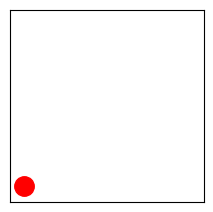

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 



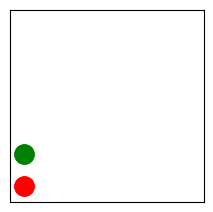

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 0 0 0 0 0 0 



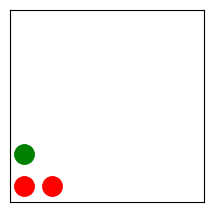

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 2 0 0 0 0 0 



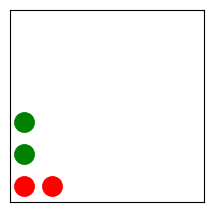

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
1 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 2 0 0 0 0 0 



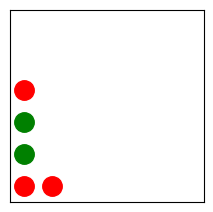

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 2 0 0 0 0 0 



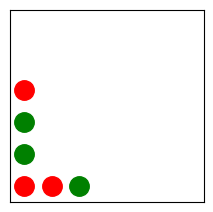

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 0 0 0 0 0 
1 0 0 0 0 0 0 
2 2 1 0 0 0 0 



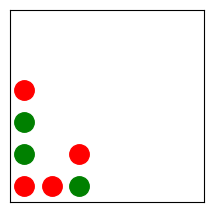

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 0 0 0 0 0 
1 0 2 0 0 0 0 
2 2 1 0 0 0 0 



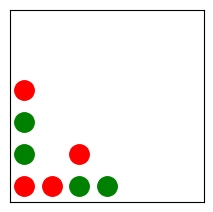

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 0 0 0 0 0 
1 0 2 0 0 0 0 
2 2 1 1 0 0 0 



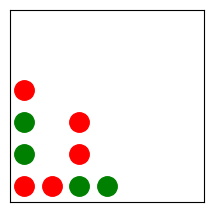

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 2 0 0 0 0 
1 0 2 0 0 0 0 
2 2 1 1 0 0 0 



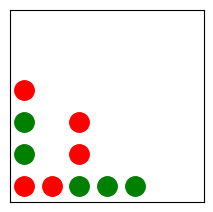

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 2 0 0 0 0 
1 0 2 0 0 0 0 
2 2 1 1 1 0 0 



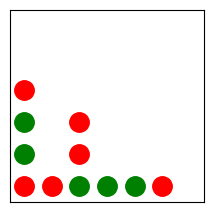

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 2 0 0 0 0 
1 0 2 0 0 0 0 
2 2 1 1 1 2 0 



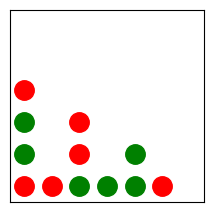

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 2 0 0 0 0 
1 0 2 0 1 0 0 
2 2 1 1 1 2 0 



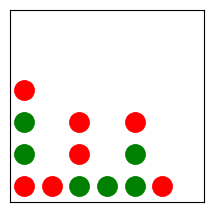

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 2 0 2 0 0 
1 0 2 0 1 0 0 
2 2 1 1 1 2 0 



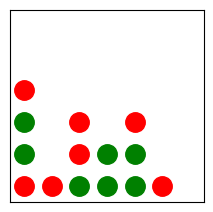

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 0 0 0 
1 0 2 0 2 0 0 
1 0 2 1 1 0 0 
2 2 1 1 1 2 0 



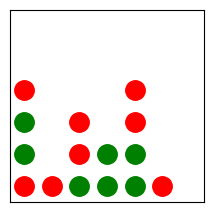

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 2 0 0 
1 0 2 0 2 0 0 
1 0 2 1 1 0 0 
2 2 1 1 1 2 0 



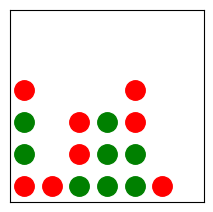

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 0 2 0 0 
1 0 2 1 2 0 0 
1 0 2 1 1 0 0 
2 2 1 1 1 2 0 



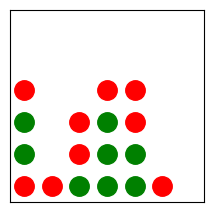

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 2 2 0 0 
1 0 2 1 2 0 0 
1 0 2 1 1 0 0 
2 2 1 1 1 2 0 



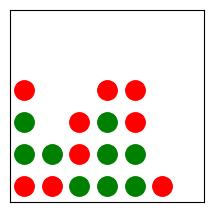

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 0 2 2 0 0 
1 0 2 1 2 0 0 
1 1 2 1 1 0 0 
2 2 1 1 1 2 0 



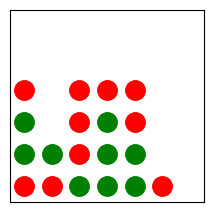

0 0 0 0 0 0 0 
0 0 0 0 0 0 0 
2 0 2 2 2 0 0 
1 0 2 1 2 0 0 
1 1 2 1 1 0 0 
2 2 1 1 1 2 0 



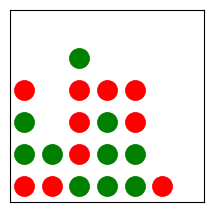

0 0 0 0 0 0 0 
0 0 1 0 0 0 0 
2 0 2 2 2 0 0 
1 0 2 1 2 0 0 
1 1 2 1 1 0 0 
2 2 1 1 1 2 0 



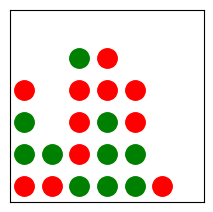

0 0 0 0 0 0 0 
0 0 1 2 0 0 0 
2 0 2 2 2 0 0 
1 0 2 1 2 0 0 
1 1 2 1 1 0 0 
2 2 1 1 1 2 0 



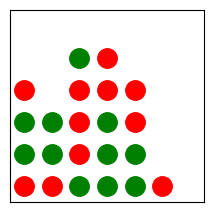

0 0 0 0 0 0 0 
0 0 1 2 0 0 0 
2 0 2 2 2 0 0 
1 1 2 1 2 0 0 
1 1 2 1 1 0 0 
2 2 1 1 1 2 0 



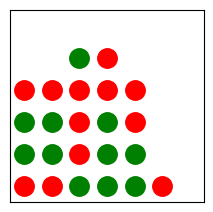

0 0 0 0 0 0 0 
0 0 1 2 0 0 0 
2 2 2 2 2 0 0 
1 1 2 1 2 0 0 
1 1 2 1 1 0 0 
2 2 1 1 1 2 0 



In [143]:
playback_game([0, 0, 1, 0, 0, 2, 2, 3, 2, 4, 5, 4, 4, 3, 4, 3, 3, 1, 2, 2, 3, 1, 1], 2)

#(2, 2, [0, 0, 1, 0, 0, 2, 2, 3, 2, 4, 5, 4, 4, 3, 4, 3, 3, 1, 2, 2, 3, 1, 1]
#[2, 1, [0, 5, 1, 4, 2, 3, 6, 2, 1, 1, 0, 0, 0, 1, 6, 2, 3, 3]]